In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2025-07-28 11:08:19--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 142.250.98.101, 142.250.98.138, 142.250.98.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2025-07-28 11:08:19--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2025-07-28 11:08:20 (97.6 M

In [ ]:
df = pd .read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


We are going to work on height column so let's store it in a different dataframe.

In [ ]:
df_height = df["Height"]

<Axes: xlabel='Height', ylabel='Count'>

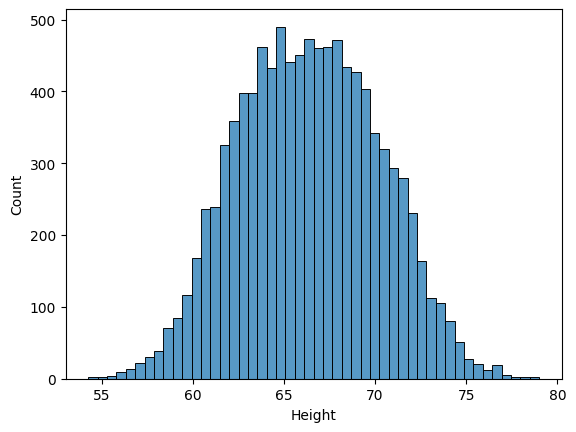

In [ ]:
sns.histplot(df_height)

In [ ]:
# mean of the entire population
mu = df_height.mean()
mu

np.float64(66.36755975482124)

In [ ]:
sigma = df_height.std()
sigma

3.8475281207732324

We will now randomly select five samples and determine the average height of these samples

## <font color='purple'>**Sample size = 5**</font>

In [ ]:
df_height.sample(5)

,Height
5474,66.674360
3578,70.606092
2836,70.859347
641,71.568734
3886,69.231469


In [ ]:
np.mean(df_height.sample(5))

np.float64(67.4731359964739)

<font color='orange'>**Observation**</font>
-  We can notice that on running the above code, it is generating 5 different samples every time and the sample mean is also changing with that.  

Let's repeat this process 10,000 times so we will get sample means of 10,000 unique samples (size = 5).

We will plot the distributions of these 10,000 sample means to see if they follow the normal distribution.

In [ ]:
sample_5 = [np.mean(df_height.sample(5)) for i in range(10000) ]

<Axes: ylabel='Count'>

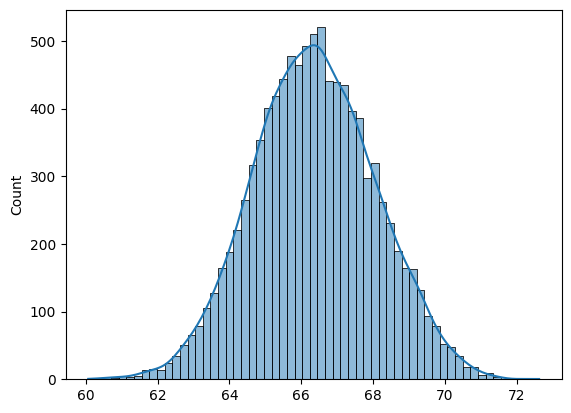

In [ ]:
sns.histplot(sample_5, kde=True)

In [ ]:
np.mean(sample_5)

np.float64(66.36288524668917)

In [ ]:
np.std(sample_5)

np.float64(1.6943189092569417)

<font color='orange'>**Observation**</font>  

- We can conclude that the distribution of those 10000 samples means is normally distributed and most of the values lies between 62 and 72.  

- There might be some cases where the samples contain only short peoples that is why we can see some values between 60 and 62  

- Similarly, there might be some cases where the samples contain only tall people that is why we can see some values between 70 and 72.  

## <font color='purple'>**Sample size = 20**</font>

> <font color='purple'>**Q1. What would happen If we increase the size of our sample?**</font>  

We studied earlier in the lecture that as we increase the size of the sample, the spread of data will be less.   

- This means, as we increase the size of the sample, the sample mean will come closer and closer to the population mean

Let's try this out.

- Let's increase the sample size to 20.
- We will again perform 10,00 iterations and plot the distributions of the sample means

In [ ]:
sample_20 = [np.mean(df_height.sample(20)) for i in range(10000) ]

<Axes: ylabel='Count'>

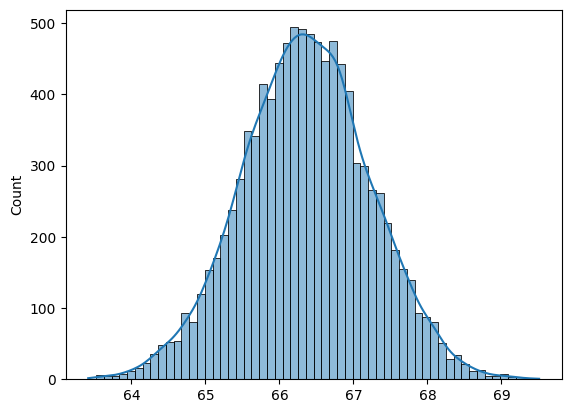

In [ ]:
sns.histplot(sample_20, kde=True)

In [ ]:
np.mean(sample_20)

np.float64(66.36055592849031)

In [ ]:
np.std(sample_20)

np.float64(0.8613409836645549)

<font color='orange'>**Observation**</font>   


- We can clearly see that as <font color='purple'>**we increase the number of samples from 5 to 20, the sample means come closer to the actual mean and the standard deviation becomes less**</font>.  

- Previously the majority of the values were between 62 and 72. Now the spread of the data has decreased and values lie between 64 and 69  

So we can assert that by <font color='purple'>increasing the size of the sample, the variability or SD of the sample distributions decreases and the sample mean tends to be much closer to the population mean</font>.

## <font color='purple'>**Comparison of Statistics**</font>

Let's compare the statistics of population data and sample data to observe some patterns

In [ ]:
# population mean
mu = df_height.mean()

# population SD
sigma = df_height.std()

# mean of sample distributions having sample size = 5
mu_5 = np.mean(sample_5)

# SD of sample distributions having sample size = 5
sigma_5 = np.std(sample_5)

# mean of sample distributions having sample size = 20
mu_20 = np.mean(sample_20)

# SD of sample distributions having sample size = 20
sigma_20 = np.std(sample_20)

In [ ]:
print(mu, mu_5, mu_20)
print(sigma, sigma_5, sigma_20)

66.36755975482124 66.36288524668917 66.36055592849031
3.8475281207732324 1.6943189092569417 0.8613409836645549


<font color='orange'>**Observation**</font>  

Here,  

**Population Statistics:**  
- $μ$ = population mean  
- $σ$ = population standard deviation  

**Sample Statistics:**  
- $μ_5$ = mean of sample means (from samples of size 5)  
- $σ_5$ = standard deviation of the sample means (from samples of size 5)

- $μ_{20}$ = mean of sample means (from samples of size 20)  
- $σ_{20}$ = standard deviation of the sample means (from samples of size 20)


<br>

**Observations:**

1. <font color="purple"> Mean of the sampling distribution is equal to the mean of the population</font>

  - $\Large μ_{\bar x} = μ$  



2. <font color='purple'>As we increase the sample size, the SD of sample means decreases</font>.  

  - The **SD of sampling distribution ($σ_{\bar x}$) is less than the population SD ($σ$).**

  - $\Large σ > σ_5 > σ_{20}$  

<br>

This aligns with the CLT, which states that the standard deviation of the sampling distribution ($σ_{\bar x}$) is the standard deviation of the population ($σ$) divided by the square root of the sample size: $\Large σ_{\bar x} = \frac{σ}{\sqrt n}$   

  We have already studied it, it is known as **Standard Error**. It indicates that how far my sample mean is from the actual mean.  

## <font color='blue'>**Summarizing CLT**</font>

> <font color='purple'>How can we mathematically represent it?</font>  

We can describe the sampling distribution of the mean using this notation:  

<font color='purple'>**$\Large {\bar X} \backsim \Large N(μ \ , \ \frac{σ}{\sqrt n})$**</font>  

Where:

- $\bar X$ is the sampling distribution of the sample means  

- $ \backsim$ means “follows the distribution”   

- $N$ is the normal distribution  

- $µ$ is the mean of the population  

- $σ/\sqrt n$ is the standard deviation of sample means distribution  




## <font color='purple'>**Example 1:**</font>
```  
Systolic blood pressure of a group of people is known to have an average of 122 mmHg
and a standard deviation of 10 mmHg.
Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.  

```

Given,  
For the entire population  

- $μ$ = 122
- $σ$ = 10

We need to calculate the probability that average BP of 16 people will be > 125  

- Sample size n = 16  
- and by CLT, the $\bar X$ = $μ$ = 122  
- The standard deviation will be

<br>

So, the probability of finding people having greater than 125 average BP will be  
we know,  

$P[X>125] = 1 - P[X < 125] $  

> <font color='purple'>**How can we find P[X < 125]?**</font>  

by calculating "norm.cdf(zscore)"

In [ ]:
# SE = σ/sqrt(n)

sigma = 10/np.sqrt(16)
sigma

np.float64(2.5)

In [ ]:
import scipy.stats
from scipy.stats import norm

In [ ]:
# P[X>125]=1−P[X<125]

probability = 1 - norm.cdf(0.07)

probability

np.float64(0.47209682981947887)

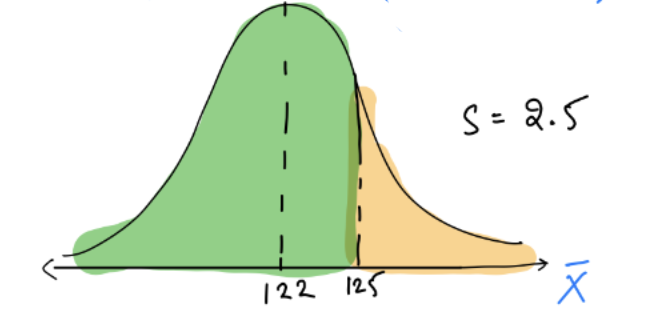

#CI using Bootstrap method


In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

NameError: name 'np' is not defined

In [ ]:
survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

> <font color='purple'>**Q1. Which of the two surveys is better for estimating the population parameter or which survey is more reliable?**</font>  


By observing the samples we can conclude that values in survey 1 is much closer to the mean values so survey 1 will be more accurate for estimation

> <font color='purple'>**Q2. Now, can we simulate more and more sets of samples like the ones above?**</font>

For this statisticians come up with something which has reasonable amount of accuracy.


### <font color='purple'>**Sample With Replacement**</font>

- Statistician suggested that take your survey and then create more samples from the same survey only using **replacement**.

- Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples.

In [ ]:
n = 6
bootstrapped_samples = np.random.choice(survey_1, size=n)
bootstrapped_samples

Here we will get an array of length 6 where each element is one of the original data points from survey 1 which is randomly chosen.  

Every time we run this code, we will get a different array so we can observe that the mean of this newly constructed array will also be different.

In [ ]:
np.mean(bootstrapped_samples)

In [ ]:
bootstrapped_samples = np.random.choice(survey_2, size=n)
np.mean(bootstrapped_samples)



Let's observe the difference between survey_1 and survey_2 by running the code several times.  


- We can observe that in survey 1, the mean value is always close to 35
But in survey 2, it sometimes comes to 35, sometimes 40, sometimes 39 so there is more variance in survey 2.  


So we will go with survey_1 as it has the higher confidence because the variance in survey_1 is less.


**Let's draw a histogram of this survey**

In [ ]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_survey_1.append(bootstrapped_mean)

In [ ]:
sns.histplot(bootstrapped_means_survey_1)

In [ ]:
bootstrapped_means_survey_2 = []
for reps in range(10000):
    bootstrapped_samples = np.random.choice(survey_2, size=n)
    bootstrapped_mean = np.mean(bootstrapped_samples) # Replace by any statistic (median, percentile)
    bootstrapped_means_survey_2.append(bootstrapped_mean)

In [ ]:
sns.histplot(bootstrapped_means_survey_2)

<br>
<br>

> <font color='purple'>**Let's compare these two histograms, what can we observe?**  

- **We can observe that in survey_2, the interval or range is somewhere between 20-50**   

  **While in survey_1, it is between 33-36 which is very close to the actual mean**  

So we can conclude that <font color='purple'>survey 1 is more accurate than survey 2</font>

### <font color='purple'>**How to compute the condidence interval?**</font>   

We can calculate the percentile of **bootstrapped mean**

- 2.5th percentile will give me lower bound (x1)

- 97.5th percentile will give me upper bound (x2)

Then, confidence inteval will be [x1, x2]

In [ ]:
len(bootstrapped_means_survey_1)

In [ ]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5)
x1

In [ ]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)
x2

We can observe that 95% of the numbers lies between 34 & 36 so  
**Confidence Interval: $(x1, x2)$**